# Assignment I - Linear Optimization
## Master in Big Data Analytics - UC3M
### Jose Antonio Jijon Vorbeck - 100438045

**Problem Definition**

For this assignment, the porblem chosen is about the distribution of the vaccines throughout the cities in Spain. I have made the assumption that only 8 cities accross the country will be in charge of the distribution, and that a total of 20 cities, (including the ones in charge of the distribution) are going to be receiving vaccines. 

I have made a rough estimation of how many packs of vaccines are cities going to need based on the following assumptions. After doing some research I calculated that the most important segments of the population that need vaccine are medical personel, people at risk and older people. Adding up to around 20% of the total population. And the packs of vaccines come in units of 2000 vaccines. 

Therefore the demand of packs of vaccines that each city is going to need is calculated in the following way: 

$$Demand = City_{pop} *  \frac{0.2}{2000} $$

The distances between all the cities was obtained using Google Maps, and the supplies of boxes of vaccines was estimated after calculating the demand of the other cities. I have tried to choose only a limited number of cities to scale the problem down, since it would get to complex to fill all the distances. 

I have assumed a delivery cost of 5EUR per kilometer, and the distance between any city and itself is equal to 1 to be able to do the calculation when a city delivers to itself.


**Descriptive Map**

Below we can see a map with the cities that I have chosen for this assignment. In blue we have the cities that will be delivering the vaccine (but also receiving), and in red the ones that are going to be receiving only. I know I might have skipped many cities, but for the sake of not making the problem too big I had to choose only a set of them.

![Cities Recieving/Sending Vaccines](Ciudades.png)

**Problem Table**

Distances[km] | Mad | Bcn | Vlc | Bilb | Sev | Zar | ACor | Vall | *Demand*
--------------|-----|-----|-----|------|-----|-----|------|------|---------
Mad| 1|621|352|395|538|193|609|193|327
Bcn|621|1|349|620|1,046|296|1,118|663| 164
Vlc| 352|349|1|633|697|326|961|545| 79
Bilb| 395|620|633|1|993|324|644|280| 35
Sev| 538|1,046|697|993|1|863|947|589| 69
Zar | 193|296|326|324|863|1|833|367| 67
ACor| 609|1,118|961|644|947|833|1|455| 25
Vall| 193|663|545|280|589|367|455|1| 30
Oviedo| 451|902|803|304|789|604|340|252| 22
Santander| 393|693|673|108|837|397|547|248| 17
Pampl| 407|437|501|159|945|175|738|325| 20
Logroño| 336|468|481|152|874|172|650|237| 15
Girona| 721|100|449|720|1,146|396|1,218|763| 10
Salam| 212|778|564|395|474|482|473|115| 14
Badajoz| 401|1,022|716|694|217|726|772|414| 15
Toledo| 71|692|372|466|458|396|675|258| 8
Cordoba| 400|908|545|795|138|725|995|578| 33
Alicante| 422|515|166|817|609|498|1,031|615| 33
Murcia| 401|590|241|796|534|539|1,010|594| 45
Málaga| 544|997|648|939|219|869|1,153|737| 57
--------------|-----|-----|-----|------|-----|-----|------|------
*Supply*| 300|300|150|100|200|150|50|50



**a.) Formulate mathematically the problem as a linear optimization model (based on the general formulation of an LP). Identify the model sets, parameters, variables, objective function and constraints.**

**Sets:**

* *I*       Destination Cities 1 to 20 (m)

* *J*       Delivering Cities 1 to 8 (n)

**Parameters:**

$d_{ij}$ Distance to $City_i$ from $City_j$

$v_i$ Demand of Vaccine packs to be met by $City_i$

$s_j$ Supply of Vaccine packs from $City_j$

**Decision Variables**

$x_{ij}$ Amount of packs of vaccine to be shipped to $City_i$ from $City_j$




**Obj Function and Constraints**

\begin{align*}
\underset{x_{ij}}{\min} & \quad \sum_{i=1}^{m}\sum_{j=1}^{n}5d_{ij}x_{ij}\\
\text{subject to:}&\\
  &\sum_{i=1}^{m} x_{ij} \leq s_{j} \quad \forall j \in J\\
  &\sum_{j=1}^{n} x_{ij} \geq v_{i} \quad \forall i \in I\\
  &x_{ij} \geq 0 \quad \forall ij \in I,J
\end{align*}


**b.) Implement the model in Pyomo as an "AbstractModel" and solve it for a set
of (parameter) values, either based on real-world or randomly generated data (make sure
that the values you use are coherent with the model defined in a) ). In both cases, include
both your model and the specific data you have used.**

Creating the abstract model

In [22]:
%%writefile Vaccines.py

from pyomo.environ import *

model = AbstractModel()
# Parameters
model.n = Param(within=NonNegativeIntegers)
model.m = Param(within=NonNegativeIntegers)
#Sets J and I
model.I = RangeSet(1,model.n) #receiving cities
model.J = RangeSet(1,model.m) #delivering cities
# fixed cost per vaccine box per km
model.km = Param(within=NonNegativeIntegers)
# distances
model.d = Param(model.I, model.J)
#Demand
model.v = Param(model.I)
#Supply
model.s = Param(model.J)
# Decision Variables
model.x = Var(model.I, model.J, domain = NonNegativeReals)

# Obj. Function
def obj_function(model):
    return model.km*summation(model.d,model.x)

#Demand Constraint
def const_demand(model, i, j):
    return sum(model.x[i,j] for j in model.J) >= model.v[i]

#Supply Constraint
def const_supply(model, i ,j):
    return sum(model.x[i,j] for i in model.I) <= model.s[j]

model.OBJ = Objective(rule = obj_function, sense = minimize)
model.constraint1 = Constraint(model.I, model.J, rule = const_demand)
model.constraint2 = Constraint(model.I, model.J, rule = const_supply)

Overwriting Vaccines.py


Creating the input parameters

In [23]:
%%writefile VaccineData.dat

param n := 20;
param m := 8;
param km := 5;
param d : 1 2 3 4 5 6 7 8:= 
1 1 621 352 395 538 193 609 193
2 621 1 349 620 1046 296 1118 663
3 352 349 1 633 697 326 961 545
4 395 620 633 1 993 324 644 280
5 538 1046 697 993 1 863 947 589
6 193 296 326 324 863 1 833 367
7 609 1118 961 644 947 833 1 455
8 193 663 545 280 589 367 455 1
9 451 902 803 304 789 604 340 252
10 393 693 673 108 837 397 547 248
11 407 437 501 159 945 175 738 325
12 336 468 481 152 874 172 650 237
13 721 100 449 720 1146 396 1218 763
14 212 778 564 395 474 482 473 115
15 401 1022 716 694 217 726 772 414
16 71 692 372 466 458 396 675 258
17 400 908 545 795 138 725 995 578
18 422 515 166 817 609 498 1031 615
19 401 590 241 796 534 539 1010 594
20 544 997 648 939 219 869 1153 737
;
param v :=
1 327
2 164
3 79
4 35
5 69
6 67
7 25
8 30
9 22
10 17
11 20
12 15
13 10
14 14
15 15
16 8
17 33
18 33
19 45
20 57
;
param s :=
1 300
2 300
3 150
4 100
5 200
6 150
7 50
8 50
;

Overwriting VaccineData.dat


In [24]:
#Solving the model
!pyomo solve Vaccines.py VaccineData.dat --solver=glpk --summary --solver-suffix=dual

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.01] Creating model
[    0.05] Applying solver
[    0.11] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: feasible
      Function Value: 315400.0
    Solver results file: results.yml

Solution Summary

Model unknown

  Variables:
    x : Size=160, Index=x_index
        Key     : Lower : Value : Upper : Fixed : Stale : Domain
         (1, 1) :     0 : 292.0 :  None : False : False : NonNegativeReals
         (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 3) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 4) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 5) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 6) :     0 :  35.0 :  None : False : False : NonNegativeReals
         (1, 7) :     0 :   0.0 :  None : False : False : NonNegativeReals
  

The graph below describes the directions of the shippings from the origin cities to the destination ones according to the results obtained
![Results part b.](CiudadesResultados.png)

**c.) Compute the sensitivities associated with each constraint, and interpret their
values.**

The constraints and dual solutions are saved in the results.yml file, and I will explain their meaning in the following lines. 

We had two different constraints, one associated with the demand of packages of vaccines per city (20 cities) size [20,1] and one for the maximum supply of packages of vaccines that the delivering cities can afford (8 cities) size [1,8]. This adds up to a total of 28 constraints. 

*The demand Constraint*

These are some of the results: 
(I will comment only the most interesting ones for the sake of simplicity) 

    constraint1[1,1]:
      Dual: 965
    constraint1[18,1]:
      Dual: 2295
    constraint1[19,1]:
      Dual: 2670
    constraint1[2,1]:
      Dual: 5
    constraint1[5,1]:
      Dual: 4.99999999999983
    constraint1[6,1]:
      Dual: 4.99999999999999

[1,1] refers to the demand of the city of Madrid, as can be seen in the table at the beginning. This means that if the demand of Madrid increases by 1 unit, the total delivery cost would be 965EUR larger. 

It is interesting to see which cities would have an enormous impact on the total cost by increasing its demand, there are two cases, one for Alicante [18,1] that increases the total cost by 2295EUR, and another for Murcia [19,1] that increses the total cost by 2670EUR if either demand increases by one unit.

While cities like Barcelona [2,1], Sevilla and Zaragoza [5,1] and [6,1] have a minor impact on the increase of the total cost by the increase of the demand. Since they have enough supply to cover for its own increase in demand and can deliver it to "themselves", since the 3 cities are delivering cities. 

For the case of the bounds, we see that all demand constraints are satisfied and all are equal to their actual demand values, since that is the limiting case for which the costs are minimized while satisfying the constraints.

*The Supply Constraint*

In this case, we have only 4 outputs, corresponding to Madrid, Valencia, Bilbao and Valladolid: 

    constraint2[1,1]:
      Dual: -960
    constraint2[1,3]:
      Dual: -1465
    constraint2[1,4]:
      Dual: -80
    constraint2[1,8]:
      Dual: -340
      
We can see that increasing the supply of Madrid, would allow a decrease in the delivery costs by 960 EUR. Most interesting is the case of Valencia, where an increase of the supply by one unit, would mean a decrease of the total costs by 1465 EUR. This result makes complete sense with the resluts of the demand constraint, since we see that increasing the demand of cities like Alicante or Murcia would result in the highest increase of total costs.

Incresing the supply of cities like Barcelona, Sevilla, Zaragoza or A Coruña does not result in any change in the total cost, since these cities are able to satisfy all the demand of their neighbour cities without running out of supply.

**d.) Modify the problem in a) to impose some logical or conditional (linear) constraints that require the use of binary or integer variables. Implement and solve this new
model in Pyomo as an "AbstractModel" and interpret the results. Include the data used
for the solution of the problem.**

*1. Extra supply must be shipped away, even if demand is satisfied*

Delivering cities must finish all its supply even if the demands of other cities is satisfied, to start vaccinating other population groups if needed. The delivering cities cannot keep this extra supply to themselves, and **must** ship it to other cities. 

If cities do not ship away all of their supply of vaccines, they get a **penalty P** in the cost.

*2. Cities cannot simply stay with the surplus in supply*

Cities cannot avoid paying the penalty by just simply staying with all its surplus in supply, they must either send it to neighbouring cities or pay the penalty. (I have added this condition to make the distribution matrix even more interesting, since more communications will be happening).

*3. Vaccine packages to be send must be whole packages, so we need to set variables to be integers*

This changes the objective function to the following: 

**Obj. function**

\begin{align*}
\underset{x_{ij}}{\min} & \quad \sum_{i=1}^{20}\sum_{j=1}^{8}5d_{ij}x_{ij} + \sum_{j=1}^{8}Py_{j}\\\\
\text{subject to:}&\\
  &\sum_{i=1}^{20} x_{ij} \leq s_{j} \quad \forall j \quad in J\\
  &\sum_{j=1}^{8} x_{ij} \geq v_{i} \quad \forall i \quad \in I\\
  &\sum_{i=1}^{20} x_{ij} + y_{j}M \geq s_{j} \quad \forall j \quad \in J\\
  &\sum_{j=1}^{8} x_{jj} \leq v_{j} \quad \forall j \quad \in J\\\\
  &x_{jj} \leq v_{j} \quad \forall j \in J\\\\
  &x_{ij} \geq 0 \in \mathbb{N} \quad \forall ij \in I,J\\\\
  &y_{j} \quad Binary\\
\end{align*}

Now we implement the problem using a function definition for the whole abstract model:

In [25]:
import numpy as np

n = 20;
m = 8;
km = 5;

# distances
d = np.array([[1, 621, 352, 395, 538, 193, 609, 193],[621, 1, 349, 620, 1046, 296, 1118, 663],[352,  349,   1, 633, 697, 326, 961, 545],
            [395,  620, 633,   1, 993, 324, 644, 280], [538, 1046, 697, 993,   1, 863, 947, 589], [193,  296, 326, 324, 863,   1, 833, 367],
            [609, 1118, 961, 644, 947, 833,   1, 455], [193,  663, 545, 280, 589, 367, 455, 1], [451,  902, 803, 304, 789, 604, 340, 252],
            [393, 693, 673, 108, 837, 397, 547, 248], [407, 437, 501, 159, 945, 175, 738, 325], [336, 468, 481, 152, 874, 172, 650, 237],
            [721, 100, 449, 720, 1146, 396, 1218, 763], [212, 778, 564, 395, 474, 482, 473, 115], [401, 1022, 716, 694, 217, 726, 772, 414],
            [71, 692, 372, 466, 458, 396, 675, 258], [400, 908, 545, 795, 138, 725, 995, 578], [422, 515, 166, 817, 609, 498, 1031, 615],
            [401, 590, 241, 796, 534, 539, 1010, 594], [544, 997, 648, 939, 219, 869, 1153, 737]])

# demand
v = np.array([327,164,79,35,69,67,25,30,22,17,20,15,10,14,15,8,33,33,45,57]);

# supply 
s = np.array([300,300,150,100,200,150,50,50])
#Big Value
M = 5000;
# Penalty
P = 20000;

In [26]:
from pyomo.environ import *
opt = SolverFactory("glpk")
from pyomo.opt import SolverFactory

def solverfunction(n,m,km,d,v,s,M,P):
    
    model = AbstractModel()
    # Parameters

    #Sets J and I
    model.I = RangeSet(1,n) #receiving cities
    model.J = RangeSet(1,m) #delivering cities
    # fixed cost per vaccine box per km
    model.km = km
    # distances
    model.d = d
    #Demand
    model.v = v
    #Supply
    model.s = s
    # Decision Variables
    model.x = Var(model.I, model.J, domain = NonNegativeIntegers)
    # Binary variables
    model.y = Var(model.J, domain = Binary)
    # Big Value
    model.M = M
    # Penalty
    model.P = P
    
    # Obj. Function
    def obj_function(model):
        return (model.km * sum(sum(model.d[i-1,j-1]*model.x[i,j] for i in model.I) for j in model.J) + sum(model.y[j]*model.P for j in model.J))
    
    #Demand Constraint
    def const_demand(model, i, j):
        return sum(model.x[i,j] for j in model.J) >= model.v[i-1]
    
    #Supply Constraint
    def const_supply(model, i ,j):
        return sum(model.x[i,j] for i in model.I) <= model.s[j-1]
    
    #Excess Supply Constraint
    def const_excess(model, i, j):
        return sum(model.x[i,j] for i in model.I) + model.y[j]*model.M >= model.s[j-1]
    
    #Cities cannot satisfy all its own demand
    def const_cities(model, i ,j):
        return model.x[j,j] <= model.v[j-1]
    
    model.OBJ = Objective(rule = obj_function, sense = minimize)
    model.const_demand= Constraint(model.I, model.J, rule = const_demand)
    model.const_supply = Constraint(model.I, model.J, rule = const_supply)
    model.const_excess = Constraint(model.I, model.J, rule = const_excess)
    model.const_city = Constraint(model.I, model.J, rule = const_cities)
    
    instance = model.create_instance()
    results = opt.solve(instance)
    
    x_solu = np.zeros((n,m))
    
    for i in range(0,n):
        for j in range(0,m):
            x_solu[i,j] = instance.x[i+1,j+1].value
            
    y_solu = np.zeros(m)
    
    for i in range(0,m):
        y_solu[i] = instance.y[i+1].value
    
    return instance.OBJ(), x_solu, y_solu

In [27]:
[ObjResult, x_solu, y_solu] = solverfunction(n,m,km,d,v,s,M,P)

In [28]:
import pandas as pd
print(f'Objective Function Result: {ObjResult}')
Y = pd.DataFrame(data= y_solu, index = ["Mad","Bcn","Vlc","Bilb","Sev","Zar","Acor","Vall"], columns = ["Y"])
X = pd.DataFrame(data= x_solu, index = ["Mad","Bcn","Vlc","Bilb","Sev","Zar","Acor","Vall","Oviedo","Santander","Pamp","Logr","Girona","Salam","Badajoz","Toledo","Cordoba","Alicante","Murcia","Malaga"], columns= ["Mad","Bcn","Vlc","Bilb","Sev","Zar","Acor","Vall"])
print(f'Solution Matrix x')
X["Demand"] = v
X

Objective Function Result: 385760.0
Solution Matrix x


,Mad,Bcn,Vlc,Bilb,Sev,Zar,Acor,Vall,Demand
Mad,298.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,327
Bcn,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,164
Vlc,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,79
Bilb,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,35
Sev,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,69
Zar,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,67
Acor,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,25
Vall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30
Oviedo,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,22
Santander,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,17


In [29]:
print(f'Solution Vector y_j')
Y

Solution Vector y_j


,Y
Mad,0.0
Bcn,1.0
Vlc,0.0
Bilb,0.0
Sev,0.0
Zar,1.0
Acor,0.0
Vall,0.0


We see that the cities that do not pay their penalties must send all their supply to other cities, like for example A Coruña or Sevilla, while Barcelona and Zaragoza prefer to pay the penalty than to distribute their excess in surplus, maybe because it is more expensive for those cities to distribute because of the large distances that have to other cities. 

We recall that the former total cost was 315400.0 EUR, while the new total cost with these new constraints is 385760.0 EUR, meaning almost 70 000 EUR more expensive. This is due the penalties and the excess in vaccines that are sent to cities even if they reached their demand already. 

**e.) Write the code to define the relaxed problem corresponding to the one in d),
that is, the linear programming problem you would obtain if you do not take into account
any integrality constraints on the variables. Compare the solutions for both problems and
comment on them.**

In [30]:
from pyomo.environ import *
opt = SolverFactory("glpk")
from pyomo.opt import SolverFactory

def solverfunctione(n,m,km,d,v,s,M,P):
    
    model = AbstractModel()
    # Parameters

    #Sets J and I
    model.I = RangeSet(1,n) #receiving cities
    model.J = RangeSet(1,m) #delivering cities
    # fixed cost per vaccine box per km
    model.km = km
    # distances
    model.d = d
    #Demand
    model.v = v
    #Supply
    model.s = s
    # Decision Variables
    model.x = Var(model.I, model.J, domain = NonNegativeReals)
    # Binary variables
    model.y = Var(model.J, domain = NonNegativeReals, bounds = (0,1))
    # Big Value
    model.M = M
    # Penalty
    model.P = P
    
    # Obj. Function
    def obj_function(model):
        return (model.km * sum(sum(model.d[i-1,j-1]*model.x[i,j] for i in model.I) for j in model.J) + sum(model.y[j]*model.P for j in model.J))
    
    #Demand Constraint
    def const_demand(model, i, j):
        return sum(model.x[i,j] for j in model.J) >= model.v[i-1]
    
    #Supply Constraint
    def const_supply(model, i ,j):
        return sum(model.x[i,j] for i in model.I) <= model.s[j-1]
    
    #Excess Supply Constraint
    def const_excess(model, i, j):
        return sum(model.x[i,j] for i in model.I) + model.y[j]*M >= model.s[j-1]
    
    #Cities cannot satisfy all its own demand
    def const_cities(model, i ,j):
        return model.x[j,j] <= model.v[j-1]
    
    model.OBJ = Objective(rule = obj_function, sense = minimize)
    model.const_demand= Constraint(model.I, model.J, rule = const_demand)
    model.const_supply = Constraint(model.I, model.J, rule = const_supply)
    model.const_excess = Constraint(model.I, model.J, rule = const_excess)
    model.const_city = Constraint(model.I, model.J, rule = const_cities)
    
    instance = model.create_instance()
    results = opt.solve(instance)
    
    x_solu = np.zeros((n,m))
    
    for i in range(0,n):
        for j in range(0,m):
            x_solu[i,j] = instance.x[i+1,j+1].value
            
    y_solu = np.zeros(m)
    
    for i in range(0,m):
        y_solu[i] = instance.y[i+1].value
    
    return instance.OBJ(), x_solu, y_solu

In [31]:
[ObjResult, x_solu, y_solu] = solverfunctione(n,m,km,d,v,s,M,P)

In [32]:
import pandas as pd
print(f'Objective Function Result: {ObjResult}')
Y = pd.DataFrame(data= y_solu, index = ["Mad","Bcn","Vlc","Bilb","Sev","Zar","Acor","Vall"], columns = ["Y"])
X = pd.DataFrame(data= x_solu, index = ["Mad","Bcn","Vlc","Bilb","Sev","Zar","Acor","Vall","Oviedo","Santander","Pamp","Logr","Girona","Salam","Badajoz","Toledo","Cordoba","Alicante","Murcia","Malaga"], columns= ["Mad","Bcn","Vlc","Bilb","Sev","Zar","Acor","Vall"])
print(f'Solution Matrix x')
X["Demand"] = v
X

Objective Function Result: 316260.0
Solution Matrix x


,Mad,Bcn,Vlc,Bilb,Sev,Zar,Acor,Vall,Demand
Mad,292.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,327
Bcn,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,164
Vlc,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,79
Bilb,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,35
Sev,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,69
Zar,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,67
Acor,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,25
Vall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30
Oviedo,0.0,0.0,0.0,16.0,0.0,0.0,0.0,6.0,22
Santander,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17


In [33]:
print(f'Solution Vector y_j')
Y

Solution Vector y_j


,Y
Mad,0.0000
Bcn,0.0252
Vlc,0.0000
Bilb,0.0000
Sev,0.0038
Zar,0.0090
Acor,0.0050
Vall,0.0000


As we see, since now the cities can pay only a part of the total penalty, the distribution matrix has changed, even if it is only a little bit. We see that the objective function is much lower than the integer one, since cities are paying only a small fraction of the penalty associated to not distributing the vaccines. 

It is interesting to note that now the demand of all cities is met exaclty, with no surplus being sent, the possibility of only paying a fraction of the penalty has given the cities the change to not deliver these extra supply. Cities that have yj = 0 have no surplus in supply (Madrid, Valencia, Bilbao and Valladolid), thus they do not even consider paying the penalty.

And now there is also Sevilla and A Coruña how are paying part of this penalty, not only Zaragoza and Barcelona. 

**f.) For the integer problem in d), solve several instances with dierent sizes (dierent
numbers of variables) using randomly generated data. Comment on the impact of the size
of the problem on the time required to solve it.**

In [34]:
# creating the random data
import numpy as np
import math as math

# make a function that creates the data randomly by giving only one input parameter x
def createRandomData(x):
    m =  + math.ceil(x*np.random.rand())
    n = m + math.ceil(x*np.random.rand())
    km = 5;
    
    # distances
    d = 500.0 * np.random.rand(n,m)
    # demand
    v = 200.0 * np.random.rand(n)
    
    # supply - multiply times 2 * m to be sure the problem will always be feasible
    s = 10000*m * np.random.rand(m)
    #Big Value
    M = 5000;
    # Penalty
    P = 20000;
    return (n,m,km,d,v,s,M,P)

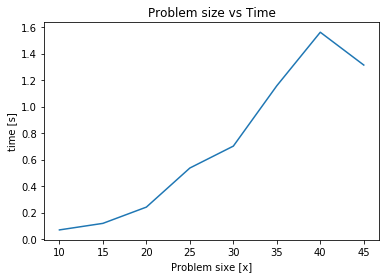

In [35]:
# run the model several instances
import numpy as np
import matplotlib.pyplot as plt
import time
sizeI = np.arange(10,50,5)
results = np.zeros(len(sizeI))
k = 15
timeSpent = np.zeros((k,len(sizeI)))
avgTime = np.zeros(len(sizeI))
for j in range(0,len(sizeI)):
    for i in range(0,k):
        start = time.time()
        [n,m,km,d,v,s,M,P] = createRandomData(sizeI[j]) #create the data
        [ObjResult, x_solu, y_solu] = solverfunctione(n,m,km,d,v,s,M,P) #solve the opt problem with the given data
        end = time.time()
        timeSpent[i,j] = end-start
    avgTime[j] = np.mean(timeSpent[:,j])
plt.plot(sizeI,avgTime)
plt.xlabel('Problem sixe [x]')
plt.ylabel('time [s]')
plt.title('Problem size vs Time')
plt.show()

Problem size x denotes the size of one of the sides of the variable matrix, so we see that as the varible matrix increases, the problem size increases, we get an exponential increse in the time it takes the computer to solve the problem.

Because of the data being randomly generated at each time, the function takes sometimes longer time for smaller problems, and then less time for bigger ones, thus being very unstable from time to time. So I decided to take the **average of 15 repetitions** of the same problem one after the other and see how it would change. 

We see that the time it takes is not quite uniformly exponential, but the trend is definetely clear to observe. 

**g.) For the integer problem in d), solve several instances with the same data, using
(10 to 20) diferent values for one of the parameters in the model (choose a parameter you
think may provide insights for the interpretation of the diferent solution values). Collect
the resulting optimal values of the objective function, print and plot them. Comment on
these values.**

I find it the most interesting if we change the supply of vaccines that some cities might have and see how the problem grows in size depending on the supply of the city that is changing.

**The following function will change the value of the supply of Madrid**

In [36]:
# creating the data to change the parameters
import numpy as np
# change the values of the supply according to x
def changeSupplyData(x):
    n = 20;
    m = 8;
    km = 5;
    
    # distances
    d = np.array([[1, 621, 352, 395, 538, 193, 609, 193],[621, 1, 349, 620, 1046, 296, 1118, 663],[352,  349,   1, 633, 697, 326, 961, 545],
                [395,  620, 633,   1, 993, 324, 644, 280], [538, 1046, 697, 993,   1, 863, 947, 589], [193,  296, 326, 324, 863,   1, 833, 367],
                [609, 1118, 961, 644, 947, 833,   1, 455], [193,  663, 545, 280, 589, 367, 455, 1], [451,  902, 803, 304, 789, 604, 340, 252],
                [393, 693, 673, 108, 837, 397, 547, 248], [407, 437, 501, 159, 945, 175, 738, 325], [336, 468, 481, 152, 874, 172, 650, 237],
                [721, 100, 449, 720, 1146, 396, 1218, 763], [212, 778, 564, 395, 474, 482, 473, 115], [401, 1022, 716, 694, 217, 726, 772, 414],
                [71, 692, 372, 466, 458, 396, 675, 258], [400, 908, 545, 795, 138, 725, 995, 578], [422, 515, 166, 817, 609, 498, 1031, 615],
                [401, 590, 241, 796, 534, 539, 1010, 594], [544, 997, 648, 939, 219, 869, 1153, 737]])
    
    # demand
    v = np.array([327,164,79,35,69,67,25,30,22,17,20,15,10,14,15,8,33,33,45,57]);
    
    # supply 
    # changing the supply of madrid s[0]
    s = np.array([x,300,150,100,200,150,50,50])
    #Big Value
    M = 5000;
    # Penalty
    P = 20000;
    return (n,m,km,d,v,s,M,P)

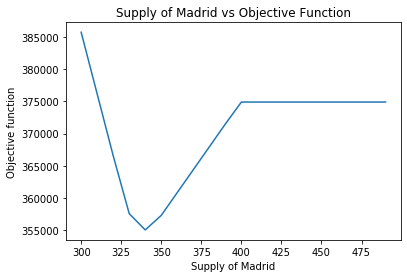

In [37]:
import matplotlib.pyplot as plt
Supply = np.arange(300,500,10)
results = np.zeros(len(Supply))
for i in range(0,len(Supply)):
    [n,m,km,d,v,s,M,P] = changeSupplyData(Supply[i]) #create the data
    [ObjResult, x_solu, y_solu] = solverfunction(n,m,km,d,v,s,M,P) #solve the opt problem with the given data
    results[i] = ObjResult

plt.plot(Supply,results)
plt.xlabel('Supply of Madrid')
plt.ylabel('Objective function')
plt.title('Supply of Madrid vs Objective Function')
plt.show()

In this case, I have decided to change the supply of Madrid from 300 to 500 vaccines in steps of 10, we clearly see how the cost reduces as the supply reaches an optimum value, but as the supply gets higher and higher, we get a bigger cost, since there is a constrain to distribute the surplus of vaccines within other cities. Because of the penalty associated with not redistributing the surplus of vaccines, we get to a point (400vaccines of supply) in which it is cheaper for the city to simply pay this fee instead of distributing more vaccines, and therefore the cost stays the same as we keep increasing the supply.

We would get a very similar pattern to every delovering city, since they all would get to a point on which it is simpler to pay the extra fee than have to distribute the extra vaccines to every city.